# Apprentissage automatique

## TP 1 - Apprentissage automatique Régression linéaire

In [1]:
#insertion des bibliothèques
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargement des données météorologiques (min ou max)
data = np.genfromtxt('Data\maxCelsius_Brest2015.txt')

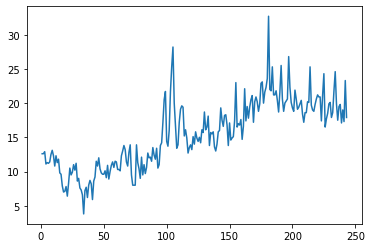

In [3]:
# Vérification des données
x = data[:, 0]
y = data[:, 1]
plt.plot(x,y)
plt.show()

In [4]:
print(x[0])

1.0


In [5]:
# La descente de gradient
## Implémentez l’algorithme de descente de gradient vu en cours afin de trouver les paramètres β0 et β1 tel que : f(xi) = β0 + β1xi

def gradientDescent(x,y, alpha0, alpha1, maxIterations):
    """ Compute a gradient descent using a linear function."""
    beta0 = np.zeros(maxIterations +1)
    beta1 = np.zeros(maxIterations +1)
    error = np.zeros(maxIterations)
    n = np.size(x)
    
    #Compute gradient descent
    
    ### Initialisation : β0 = min(y) et β1 = 1
    beta0[0] = np.min(y)
    beta1[0] = 1
    
    for i in range(maxIterations):
        # 1 - Compute error
        localError =  beta0[i] + beta1[i]*x-y
        error[i]=np.sum(localError**2)/n

        # 2 - Compute gradients -> (f^2)' = 2ff' 
        # ici : np.sum(2*localError*localError')/n
        dbeta0 = np.sum(2*localError*1)/n # localError' / db0 = 1
        dbeta1 = np.sum(2*localError*x)/n # localError' / db0 = x
        
        # 3 - Update beta0 et beta1
        beta0[i+1] = beta0[i] - alpha0 * dbeta0
        beta1[i+1] = beta1[i] - alpha1 * dbeta1
    return beta0, beta1, error

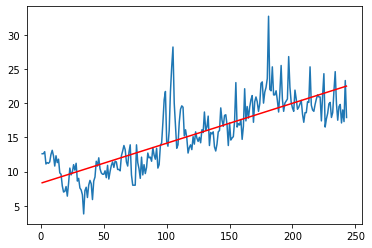

In [6]:
# test 
x = data[:, 0]
y = data[:, 1]
beta0, beta1, error = gradientDescent(x, y, 0.01, 0.00001, 1000)
xPredicted = np.arange(np.min(x), np.max(x), 0.1)
yPredicted = beta0[-1] + beta1[-1]*xPredicted

plt.plot(x, y)
plt.plot(xPredicted,yPredicted, 'r')
#plt.plot(error, 'g')
plt.show()